In [131]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
#working in local machine
Data_PATH = r"..\data\processed\onehot_2.pkl"
#working in codespace
# Data_PATH = r"/workspaces/stackoverflowDeveloper/data/processed/onehot_2.pkl"

EXPORT_PATH = r"..\data\processed\onehot_2.pkl"

TECH_COL = ["MiscTechWorkedWith", "NEWCollabToolsWorkedWith", "DatabaseWorkedWith", "WebframeWorkedWith", "LanguageWorkedWith", "PlatformWorkedWith"]
JOB_COL = "DevType"
COL_READ = TECH_COL +[JOB_COL]

# Load the data

In [4]:
df = pd.read_pickle(Data_PATH)
df.head()

MiscTechWorkedWith                                                      \
                .NET .NET Core Ansible Apache Spark Chef Cordova Flutter   
0                  1         1       0            0    0       0       0   
1                  0         0       0            0    0       0       0   
2                  0         0       0            0    0       0       0   
3                  0         0       0            0    0       0       0   
4                  0         0       1            0    0       0       0   

                        ...           DevType                          \
  Hadoop Keras Node.js  ... Developer, mobile Educator Engineer, data   
0      0     0       0  ...                 0        0              0   
1      0     0       0  ...                 1        0              0   
2      0     0       0  ...                 0        0              0   
3      0     0       0  ...                 0        0              0   
4      0     0       0  ...                 0        0              0   

                                                  \
  Engineer, site reliability Engineering manager   
0                          0                   0   
1                          0                   0   
2                          0                   0   
3                          0                   0   
4                          0                   0   

                                                             \
  Marketing or sales professional Product manager Scientist   
0                               0               0         0   
1                               0               0         0   
2                               0               0         0   
3                               0               0         0   
4                               0               0         0   

                                            
  Senior executive/VP System administrator  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  

[5 rows x 124 columns]

In [5]:
def get_skills_names(dataFrame):
    #Make a skills list 
    skills = []
    job_mask = dataFrame[("DevType", "Educator")]==1  #Educator or any job as all jobs has the same columns
    for tech_col in TECH_COL:
        skills = skills + list(dataFrame.loc[job_mask][tech_col].columns)

    return skills

skills = get_skills_names(df)
skills[:10]

['.NET',
 '.NET Core',
 'Ansible',
 'Apache Spark',
 'Chef',
 'Cordova',
 'Flutter',
 'Hadoop',
 'Keras',
 'Node.js']

In [6]:
jobs = list(df["DevType"].columns)
jobs[:10]

['Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices']

In [7]:
df_skills = df.copy().drop("DevType",axis=1)
df_skills_scaled = StandardScaler().fit_transform(df_skills)
df_skills_scaled

array([[ 1.88612836,  2.23463294, -0.21918963, ...,  1.11994429,
        -0.36706528, -0.33665307],
       [-0.53018661, -0.44750079, -0.21918963, ..., -0.89290155,
        -0.36706528,  2.97041698],
       [-0.53018661, -0.44750079, -0.21918963, ..., -0.89290155,
        -0.36706528, -0.33665307],
       ...,
       [-0.53018661, -0.44750079, -0.21918963, ..., -0.89290155,
        -0.36706528, -0.33665307],
       [-0.53018661, -0.44750079, -0.21918963, ...,  1.11994429,
        -0.36706528, -0.33665307],
       [ 1.88612836,  2.23463294, -0.21918963, ...,  1.11994429,
        -0.36706528, -0.33665307]])

In [8]:
df_skills_scaled.shape

(64461, 101)

# Use TSNE to visualize the data in 2d dimentions

In [9]:
tsne = TSNE(n_components=2,
            perplexity=3,
            max_iter=10**10,
            init="pca",
            learning_rate=0.01
            )
skills_tsne = tsne.fit_transform(df_skills_scaled.T)

c:\Users\jotha\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jotha\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\jotha\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\jotha\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 969, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\jotha\AppData\Local\Programs\Python\Python310\lib\subp

In [10]:
skills_tsne.shape

(101, 2)

In [11]:
df_skills_tsne = pd.DataFrame(skills_tsne, index=df_skills.columns, columns=["x","y"])
df_skills_tsne.head()

x          y
MiscTechWorkedWith .NET         -30.289360   4.617982
                   .NET Core    -33.536396   5.491649
                   Ansible       22.410908   5.028698
                   Apache Spark  24.061340  21.274773
                   Chef          26.616177   4.337327

In [12]:
# sns.scatterplot(x=df_skills_tsne["x"], y=df_skills_tsne["y"], hue=df_skills_tsne.droplevel(0).index)
fig = px.scatter(data_frame=df_skills_tsne, x="x", y="y",text=df_skills_tsne.droplevel(0).index)
fig.update_layout(title="skills in 2 dimentions",
                  width=1000,
                  height=1000)

# Feature(dimention) reduction...clustering

In [24]:
max_score = 0
best_model = None
best_n_clusters = 0
scores = []
for k in range(2,30):
    cluster_model = AgglomerativeClustering(n_clusters=k)
    clusters_labels = cluster_model.fit_predict(df_skills_tsne)
    
    score = silhouette_score(df_skills_tsne, clusters_labels)
    scores.append(score)

    if(np.max(scores) > max_score):
        best_model = cluster_model
        best_n_clusters = k
        max_score = np.max(scores)
         

print("max score: ", max_score)
print("best n_cluster ", best_n_clusters)

max score:  0.6557936
best n_cluster  24


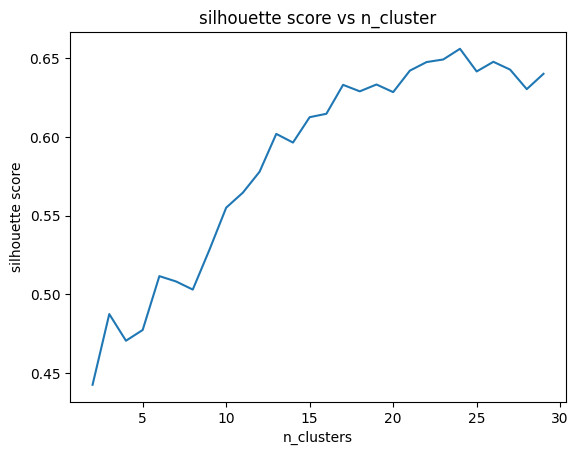

In [27]:
plt.plot(range(2,30), scores)
plt.xlabel("n_clusters")
plt.ylabel("silhouette score")
plt.title("silhouette score vs n_cluster")
plt.show()

In [31]:
fig = px.scatter(data_frame=df_skills_tsne, x="x", y="y",text=df_skills_tsne.droplevel(0).index, color=best_model.labels_)
fig.update_layout(title="skills in 2 dimentions clusterd",
                  width=1000,
                  height=1000)

In [63]:
for skill_group , skills in df_skills_tsne.index.droplevel(0).groupby(best_model.labels_).items():
    print(skill_group, ": ", list(skills))

0 :  ['.NET', '.NET Core', 'Xamarin', 'Microsoft SQL Server', 'ASP.NET', 'ASP.NET Core', 'C#', 'VBA', 'Windows']
1 :  ['IBM DB2', 'Oracle', 'Spring', 'Java', 'IBM Cloud or Watson']
2 :  ['Confluence', 'Github', 'Google Suite (Docs, Meet, etc)', 'Jira', 'Slack', 'Trello', 'Slack Apps and Integrations']
3 :  ['Ansible', 'Chef', 'Puppet', 'Teraform']
4 :  ['Keras', 'Pandas', 'TensorFlow', 'Torch/PyTorch', 'R']
5 :  ['Node.js', 'React Native', 'MongoDB', 'Express', 'Gatsby', 'React.js', 'Heroku']
6 :  ['Gitlab', 'Bash/Shell/PowerShell', 'Perl', 'Linux']
7 :  ['MariaDB', 'MySQL', 'Drupal', 'Laravel', 'Symfony', 'Vue.js', 'PHP', 'WordPress']
8 :  ['Elasticsearch', 'PostgreSQL', 'Redis', 'Go', 'Docker', 'Kubernetes']
9 :  ['Objective-C', 'Swift', 'MacOS', 'iOS']
10 :  ['Django', 'Flask', 'Python']
11 :  ['Arduino', 'Raspberry Pi']
12 :  ['Firebase', 'SQLite', 'Kotlin', 'Android', 'Google Cloud Platform']
13 :  ['Cordova', 'Angular', 'Angular.js', 'TypeScript']
14 :  ['Facebook Workplace', 'St

# create the new features

In [115]:
features = []
for skill_group , skills in df_skills_tsne.index.droplevel(0).groupby(best_model.labels_).items():
    cluster = df_skills.droplevel(0, axis=1)[skills].sum(axis=1)
    cluster.name = skill_group
    features.append(cluster)

features

[0        7
 1        0
 2        0
 3        0
 4        1
         ..
 64456    0
 64457    3
 64458    0
 64459    1
 64460    6
 Name: 0, Length: 64461, dtype: int64,
 0        1
 1        0
 2        0
 3        0
 4        0
         ..
 64456    0
 64457    3
 64458    0
 64459    1
 64460    2
 Name: 1, Length: 64461, dtype: int64,
 0        4
 1        4
 2        0
 3        0
 4        5
         ..
 64456    0
 64457    0
 64458    0
 64459    3
 64460    1
 Name: 2, Length: 64461, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        1
         ..
 64456    0
 64457    0
 64458    0
 64459    0
 64460    0
 Name: 3, Length: 64461, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 64456    0
 64457    1
 64458    0
 64459    0
 64460    0
 Name: 4, Length: 64461, dtype: int64,
 0        0
 1        1
 2        0
 3        0
 4        0
         ..
 64456    0
 64457    1
 64458    0
 64459    0
 64460    0
 Name: 5, Len

In [120]:
df_cluster = pd.concat(features ,axis=1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,7,1,4,0,0,0,0,0,1,0,...,0,2,2,0,0,0,0,0,0,0
1,0,0,4,0,0,1,1,0,0,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,5,1,0,0,1,1,3,1,...,0,0,2,0,0,0,0,0,1,2


In [127]:
y = df["DevType"]
y

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,System administrator
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# train the model